# Assignment V
**DNNs**
Fecha: 18 de octubre, 2025

**Instrucciones:** Suba sus soluciones en un archivo comprimido a Classroom antes del 28 de octubre.


## Problema 1

Lea [1] hasta la secci√≥n cinco para entender c√≥mo se usa backpropagation para calcular el gradiente de una red neuronal respecto a sus par√°metros. Luego, codifique un script en PyTorch para resolver un problema de clasificaci√≥n o regresi√≥n de alguna tarea anterior, pero esta vez usando backpropagation para calcular los gradientes. Compare los resultados que obtiene con backpropagation y usando diferenciaci√≥n autom√°tica. Anote sus conclusiones.









x.shape: torch.Size([1000, 1])
X_poly.shape: torch.Size([1000, 9])
y.shape: torch.Size([1000, 1])
[Manual] Epoch 1/40000 Loss: 4.036477e+00
[Manual] Epoch 100/40000 Loss: 8.835230e-01
[Manual] Epoch 200/40000 Loss: 8.765436e-01
[Manual] Epoch 300/40000 Loss: 8.702353e-01
[Manual] Epoch 400/40000 Loss: 8.643735e-01
[Manual] Epoch 500/40000 Loss: 8.588541e-01
[Manual] Epoch 600/40000 Loss: 8.536035e-01
[Manual] Epoch 700/40000 Loss: 8.485679e-01
[Manual] Epoch 800/40000 Loss: 8.437056e-01
[Manual] Epoch 900/40000 Loss: 8.389850e-01
[Manual] Epoch 1000/40000 Loss: 8.343813e-01
[Manual] Epoch 1100/40000 Loss: 8.298754e-01
[Manual] Epoch 1200/40000 Loss: 8.254520e-01
[Manual] Epoch 1300/40000 Loss: 8.210996e-01
[Manual] Epoch 1400/40000 Loss: 8.168089e-01
[Manual] Epoch 1500/40000 Loss: 8.125727e-01
[Manual] Epoch 1600/40000 Loss: 8.083853e-01
[Manual] Epoch 1700/40000 Loss: 8.042423e-01
[Manual] Epoch 1800/40000 Loss: 8.001400e-01
[Manual] Epoch 1900/40000 Loss: 7.960758e-01
[Manual] Epoch

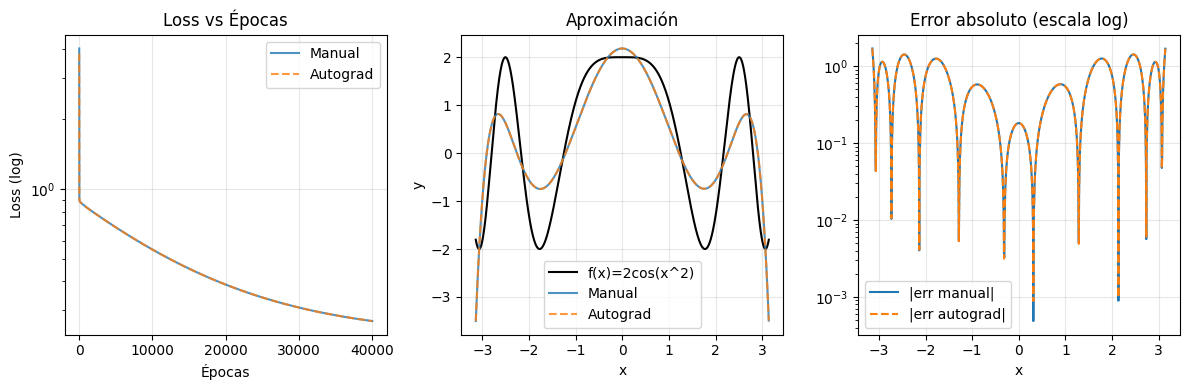


Resultados finales:
Val MSE manual:   2.699857e-01
Val MSE autograd: 2.699262e-01
Tiempo manual:   19.25 s
Tiempo autograd: 67.95 s


In [48]:
import math, time
import torch, torch.nn as nn, torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

# --------------------
# Datos
# --------------------
x = torch.linspace(-math.pi, math.pi, 1000, device=device).unsqueeze(1)
y = 2 * torch.cos(x ** 2)

x_norm = x / math.pi

grado = 8
X_poly = torch.hstack([x_norm**i for i in range(grado+1)])

# Verificaci√≥n de formas
print("x.shape:", x.shape)
print("X_poly.shape:", X_poly.shape)
print("y.shape:", y.shape)

# --------------------
# Inicializaci√≥n
# --------------------
theta_init = torch.randn(grado+1, 1, device=device)
theta = theta_init.clone().detach()

lr = 1e-1
num_epochs = 40000
log_every = 100

train_losses_manual = []

t0 = time.time()
for epoch in range(num_epochs):
    y_pred = X_poly @ theta
    err = y_pred - y
    loss = 0.5 * (err**2).mean()
    train_losses_manual.append(loss.item())

    grad = (X_poly.T @ err) / X_poly.shape[0]
    theta = theta - lr * grad

    if (epoch == 0) or ((epoch+1) % log_every == 0):
        print(f"[Manual] Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.6e}")

t_manual = time.time() - t0
print(f"‚è±Ô∏è Tiempo total (manual): {t_manual:.2f} s")

model = nn.Linear(grado+1, 1, bias=True).to(device)
with torch.no_grad():
    model.weight.copy_(theta_init.view(1, -1))

optimizer = optim.SGD(model.parameters(), lr=lr)
train_losses_auto = []

print('\nüîπ Iniciando entrenamiento autograd (nn.Linear + SGD)')
t0 = time.time()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_poly)
    loss = 0.5 * ((outputs - y)**2).mean()
    loss.backward()
    optimizer.step()
    train_losses_auto.append(loss.item())

    if (epoch == 0) or ((epoch+1) % log_every == 0):
        print(f"[Autograd] Epoch {epoch+1}/{num_epochs}  Loss: {loss.item():.6e}")

t_auto = time.time() - t0
print(f"‚è±Ô∏è Tiempo total (autograd): {t_auto:.2f} s")


with torch.no_grad():
    y_pred_manual = (X_poly @ theta).cpu().numpy().ravel()
    y_pred_auto = model(X_poly).cpu().numpy().ravel()
    x_cpu = x.cpu().numpy().ravel()
    y_cpu = y.cpu().numpy().ravel()

epochs_range = np.arange(1, len(train_losses_manual) + 1)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(epochs_range, train_losses_manual, label='Manual', alpha=0.8)
plt.plot(epochs_range, train_losses_auto, label='Autograd', alpha=0.8, linestyle='--')
plt.yscale('log')
plt.xlabel('√âpocas')
plt.ylabel('Loss (log)')
plt.title('Loss vs √âpocas')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1,3,2)
plt.plot(x_cpu, y_cpu, label='f(x)=2cos(x^2)', color='k')
plt.plot(x_cpu, y_pred_manual, label='Manual', alpha=0.8)
plt.plot(x_cpu, y_pred_auto, label='Autograd', alpha=0.8, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximaci√≥n')
plt.legend()
plt.grid(True, alpha=0.3)


plt.subplot(1,3,3)
err_manual = np.abs(y_cpu - y_pred_manual) + 1e-12
err_auto = np.abs(y_cpu - y_pred_auto) + 1e-12
plt.plot(x_cpu, err_manual, label='|err manual|')
plt.plot(x_cpu, err_auto, label='|err autograd|', linestyle='--')
plt.yscale('log')
plt.xlabel('x')
plt.title('Error absoluto (escala log)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --------------------
# M√©tricas finales
# --------------------
mse_manual = np.mean((y_cpu - y_pred_manual)**2) / 2.0
mse_auto = np.mean((y_cpu - y_pred_auto)**2) / 2.0

print('\nResultados finales:')
print(f'Val MSE manual:   {mse_manual:.6e}')
print(f'Val MSE autograd: {mse_auto:.6e}')
print(f'Tiempo manual:   {t_manual:.2f} s')
print(f'Tiempo autograd: {t_auto:.2f} s')




## Problemas 2 a 9

Lea todas las referencias en este enunciado. Estudian aspectos relevantes de modelos de redes neuronales. Luego, haga un resumen de cada una de ellas describiendo los siguientes puntos:

- ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?
- ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?
- ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas?
- Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

Referencias:

[1] Catherine F. Higham, Desmond J. Higham, Deep Learning: An Introduction for Applied Mathematicians, SIAM, Vol. 61, No. 4, pp. 860‚Äì891, 2019.

[2] G. Cybenko. Approximation by superpositions of a sigmoidal function, Mathematics of Control, Signals, and Systems, 1989, 2 (4), pp.303-314. DOI:10.1007/BF02551274.

[3] Maithra Raghu, et. al. On the expressive power of deep neural networks, ICML‚Äô17, 2017.

[4] Shiv Ram Dubey, Satish Kumar Singh, Bidyut Baran Chaudhuri, Activation Functions in Deep Learning: A Comprehensive Survey and Benchmark, Arxiv 2021.

[5] Prajit Ramachandran, Barret Zoph, Quoc V. Le, Searching for Activation Functions, Arxiv 2017.

[6] Sergey Ioffe, Christian Szegedy, Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift, ICML 2015.

[7] Shibani Santurkar, Dimitris Tsipras, Andrew Ilyas, Aleksander Madry, How Does Batch Normalization Help Optimization?, NeurIPS 2018.

[8] Siddharth Krishna Kumar, On weight initialization in deep neural networks, ArXiv 2017.



# Estructura para Problemas 2 a 9

A continuaci√≥n se presenta la plantilla que deben usar para responder cada problema (Problema 2 ‚Üí Referencia [1], Problema 3 ‚Üí Referencia [2], ..., Problema 9 ‚Üí Referencia [8]).

Para cada problema copie la secci√≥n correspondiente y complete all√≠ las respuestas (a modo de gu√≠a, aqu√≠ s√≥lo se deja la estructura ‚Äî NO RESPONDA las preguntas en esta celda):

---

## Problema 2 ‚Äî Referencia [1]
Referencia: Catherine F. Higham, Desmond J. Higham, "Deep Learning: An Introduction for Applied Mathematicians", SIAM, 2019.

**1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?**

El problema critico que el art√≠culo intenta resolver, en este caso no existe, es un articulo que aborda la necesidad de 
explicar el aprendizaje profundo con matem√°ticas. Se centra en tres preguntas clave: ¬øqu√© es una red neuronal profunda?, ¬øc√≥mo se entrena?, y ¬øc√≥mo funciona el descenso de gradiente estoc√°stico (SGD)?

A su vez la importancia de este paper radica en que el aprendizaje profundo al revolucionar muchos campos, es necesario 
entender fundamentos matematicos para crear sistemas de aprendizaje robustos los cuales puedan ser explicados y entendidos.

**2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?**

Es un recurso pedagogico le cual emplea matematicas para explicar conceptos de aprendizaje profundo, lo cual es una ventaja
ya que permite entender los fundamentos de las redes neuronales profundas.

Si se puede ver alguna desventaja quiz√° es el tema de que no es un art√≠culo que propone una nueva idea o soluci√≥n a un problema, sino que es m√°s bien una revisi√≥n explicativa.

Su fortaleza es la claridad: presenta conceptos clave (arquitecturas de red, retropropagaci√≥n, SGD) con ejemplos simples en MATLAB y demostraciones de software.

**3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?**

Las ideas presentadas en el art√≠culo se pueden implementar en PyTorch utilizando las funciones y m√≥dulos existentes para construir y entrenar redes neuronales profundas. PyTorch proporciona una amplia gama de herramientas para definir arquitecturas de redes, optimizar par√°metros y realizar el descenso de gradiente estoc√°stico.

```python
import torch
import torch.nn as nn
import torch.optim as optim


class SimpleNet(nn.Module):
def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.net = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim, output_dim),
    nn.Sigmoid())


def forward(self, x):
    return self.net(x)


model = SimpleNet(input_dim=2, hidden_dim=4, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


for epoch in range(100):
    inputs = torch.randn(10, 2)
    labels = torch.randint(0, 2, (10,))
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

**4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?**

La idea del art√≠culo es √∫til en contextos educativos y de investigaci√≥n donde se busca una comprensi√≥n m√°s profunda de los fundamentos matem√°ticos del aprendizaje profundo. Puede ser especialmente valiosa para estudiantes y profesionales que deseen desarrollar modelos m√°s robustos y explicables basados en el funcionamiento interno de las redes neuronales.

---

## Problema 3 ‚Äî Referencia [2]
Referencia: G. Cybenko, "Approximation by superpositions of a sigmoidal function", 1989.

**1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?**

Cybenko plantea y resuleve el problema de la capacidad de las redes neuronales para aproximar funciones continuas. Demuestra que una red neuronal con una sola capa oculta y funciones de activaci√≥n sigmoides puede aproximar cualquier funci√≥n continua.

Proporciona lo que es una base teorica pues da certeza de la efectividad de las redes neuronales en tareas de aproximaci√≥n de funciones, lo cual es fundamental para su aplicaci√≥n en aprendizaje autom√°tico.

**2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?**

La idea de Cybenko es fundamental para establecer la base te√≥rica del aprendizaje profundo. Una ventaja es que proporciona garant√≠as sobre la capacidad de las redes neuronales para aproximar funciones complejas. Sin embargo, una desventaja es que no aborda la eficiencia computacional ni la necesidad de m√∫ltiples capas para funciones m√°s complejas o la cantidad de nodos en la capa oculta que se necesitan para un caso concreto.

**3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?**

Las ideas de Cybenko se pueden implementar en PyTorch utilizando redes neuronales con una sola capa oculta y funciones de activaci√≥n sigmoides. PyTorch permite construir f√°cilmente estas arquitecturas y entrenarlas con datos.

```python
import torch
import torch.nn as nn
import torch.optim as optim


class SimpleNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Sigmoid(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


model = SimpleNet(input_dim=2, hidden_dim=4, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


for epoch in range(100):
    inputs = torch.randn(10, 2)
    labels = torch.randint(0, 2, (10,))
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

**4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?**

Cybenko demostr√≥ que una red neuronal **con una sola capa oculta y funci√≥n sigmoide** puede aproximar **cualquier funci√≥n continua**  

$$
f:[0,1]^n \to \mathbb{R}
$$

con precisi√≥n arbitraria:

$$
F(x)=\sum_{i=1}^{N}\alpha_i\,\sigma(w_i^T x+\theta_i)
\quad \text{tal que} \quad |F(x)-f(x)|<\varepsilon
$$

**Utilidad:**
- Las combinaciones de sigmoides forman una **base densa** en el espacio de funciones continuas.  
- Usa fundamentos del **Teorema de Hahn‚ÄìBanach** y la **dualidad de Riesz**.  
- Es la **base te√≥rica** del aprendizaje profundo: garantiza que las redes pueden modelar **cualquier relaci√≥n compleja** entre variables.
---

## Problema 4 ‚Äî Referencia [3]
Referencia: Maithra Raghu, et al., "On the expressive power of deep neural networks", ICML 2017.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

## Problema 5 ‚Äî Referencia [4]
Referencia: Shiv Ram Dubey, Satish Kumar Singh, Bidyut Baran Chaudhuri, "Activation Functions in Deep Learning: A Comprehensive Survey and Benchmark", arXiv 2021.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

## Problema 6 ‚Äî Referencia [5]
Referencia: Prajit Ramachandran, Barret Zoph, Quoc V. Le, "Searching for Activation Functions", arXiv 2017.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

## Problema 7 ‚Äî Referencia [6]
Referencia: Sergey Ioffe, Christian Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", ICML 2015.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

## Problema 8 ‚Äî Referencia [7]
Referencia: Shibani Santurkar, Dimitris Tsipras, Andrew Ilyas, Aleksander Madry, "How Does Batch Normalization Help Optimization?", NeurIPS 2018.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

## Problema 9 ‚Äî Referencia [8]
Referencia: Siddharth Krishna Kumar, "On weight initialization in deep neural networks", arXiv 2017.

1) ¬øCu√°l es el problema cr√≠tico que el art√≠culo intenta resolver? ¬øPor qu√© es relevante resolverlo?

2) ¬øQu√© opina sobre la idea propuesta? ¬øQu√© ventajas y desventajas nota?

3) ¬øC√≥mo se pueden implementar esas ideas y usar en PyTorch? ¬øYa est√°n implementadas (bibliotecas, funciones existentes)?

4) Identifique en qu√© circunstancias conviene aplicar la idea del art√≠culo. ¬øC√≥mo puede serle √∫til?

---

*Instrucciones de uso:* Copie cada secci√≥n a continuaci√≥n del enunciado correspondiente en su cuaderno, y responda a las cuatro preguntas para cada referencia. Mantenga la citaci√≥n bibliogr√°fica completa en la parte superior de cada respuesta.

